## BME i9400
## Fall 2024
### Homework 4: Stratified K-Fold Cross Validation and L2 Regularized Logistic Regression


**Due date: Wednesday, November 13th 2024, 11:59:59.987 PM EST**

In this homework, you will implement a logistic regression model with L2 regularization, and evaluate it using stratified K-Fold cross-validation.

Stratification refers to the process of rearranging the data so as to ensure that each fold is a good representative of the whole. For example, in a binary classification problem where each class comprises 50% of the data, it is best to arrange the data such that in every fold, each class comprises around half the instances.

In the cells below, I have indicated places where code needs to be added with instructions contained in double hashtags (for example ## DO SOMETHING ##). 

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, average_precision_score
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

### Set the random seed

In [2]:
## DO NOT MODIFY THIS CELL
np.random.seed(42)

### Load the data

In [3]:
## DO NOT MODIFY THIS CELL
df = pd.read_csv('parkinsons.csv')
labels = df["status"].values
features = df.drop(columns=["status", "name"]).values
features.shape, labels.shape

((195, 22), (195,))

### Create an instance of the StratifiedKFold class with 5 folds

In [4]:
## DO NOT MODIFY THIS CELL
skf = StratifiedKFold(n_splits=5)

### Task 1 
**Evaluate a logistic regression model on this dataset using 5-fold stratified cross-validation.**
- You should use the model object created in the above cell
- Do not regularize the classifier!
- Use a value for ```max_iter``` of 10000 and disregard any convergence warnings
- For each of the five folds, compute the area under the ROC curve and the average precision, storing each of them in a list
- Report the average area under the ROC curve and the average average precision across the five folds

In [21]:
rocs = []
prcs = []

## Add code for cross-validation here
for train_index, test_index in skf.split(features, labels):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = labels[train_index], labels[test_index]
    
    #creating model
    model = LogisticRegression(penalty=None, solver='saga', max_iter = 10000)
    model.fit(X_train, y_train)
    
    #getting probabilities
    y_pred = model.predict_proba(X_test)[:, 1]
    
    #ROC AUC and Average Precision for this fold
    roc_auc = roc_auc_score(y_test, y_pred)
    avg_prcs = average_precision_score(y_test, y_pred)
    
    #Storing scores
    rocs.append(roc_auc)
    prcs.append(avg_prcs)

## Report AUROC and average precision here
avg_rocauc = sum(rocs) / len(rocs)
avg_prec = sum(prcs) / len(prcs)

print(f'Average ROC AUC: {avg_rocauc}')
print(f'Average Average Precision: {avg_prec}')

Average ROC AUC: 0.6258237547892719
Average Average Precision: 0.8354561020336794


### Task 2
**Repeat Task 1, but this time adding L2 to the logistic regression model.**
- You must evaluate the following values for the hyperparameter ```C```
    - C: 0.01, 0.1, 1, 10, 100, 1000, 10000
- For each hyperparameter value, compute the average area under the ROC curve and the average average precision across the five folds, and store them in a list or numpy array
- Use a sufficiently large value for the ```max_iter``` parameter of the LogisticRegression class to avoid convergence warnings.
- Report the highest value of the average area under the ROC curve and the average average precision.
- Also report the hyperparameters that yield the best average area under the ROC curve and the average average precision.
- Create a plot with L2 hyperparameter on the x-axis, and average ROC and average precision on the y-axis (overlaid) -- use a logarithmic scale for the x-axis.


In [25]:
cc = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
rocs = np.zeros(shape = (len(cc), 5))
prcs = np.zeros(shape = (len(cc), 5))

## Add code for cross-validation here

for i, c in enumerate(cc):
    k = 0 #starting at the first fold
    for train_index, test_index in skf.split(features, labels):
        X_train, X_test = features[train_index], features[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
    
        #creating l1 model
        model_l2 = LogisticRegression(penalty='l2', solver='saga', C= c , max_iter = 10000)
        model_l2.fit(X_train, y_train)
        
        #getting probabilities
        y_pred = model_l2.predict_proba(X_test)[:, 1]
    
        #ROC AUC and Average Precision for this fold
        roc_auc = roc_auc_score(y_test, y_pred)
        avg_prcs = average_precision_score(y_test, y_pred)
        
        #Storing scores
        rocs[i,k] = roc_auc
        prcs[i,k] = avg_prcs
        k += 1

In [36]:
## Compute the average auroc and average precision for each value of cc
average_rocs = np.mean(rocs, axis=1)
average_prcs = np.mean(prcs, axis=1)

print("Average AUROC for each cc:")
for c, auroc in zip(cc, average_rocs):
    print(f'{c}: {auroc}')

print("\nAverage Precision for each cc:")
for c, prec in zip(cc, average_prcs):
    print(f'{c}: {prec}')
## Report the highest values of the average auroc and average average precision here

Average AUROC for each cc:
0.001: 0.29210727969348654
0.01: 0.46804597701149425
0.1: 0.5973435504469987
1: 0.6203065134099616
10: 0.6258237547892719
100: 0.6258237547892719
1000: 0.6258237547892719
10000: 0.6258237547892719

Average Precision for each cc:
0.001: 0.6790418988011216
0.01: 0.7457327368852924
0.1: 0.8173103426521309
1: 0.8306019140760432
10: 0.8354561020336794
100: 0.8354561020336794
1000: 0.8354561020336794
10000: 0.8354561020336794


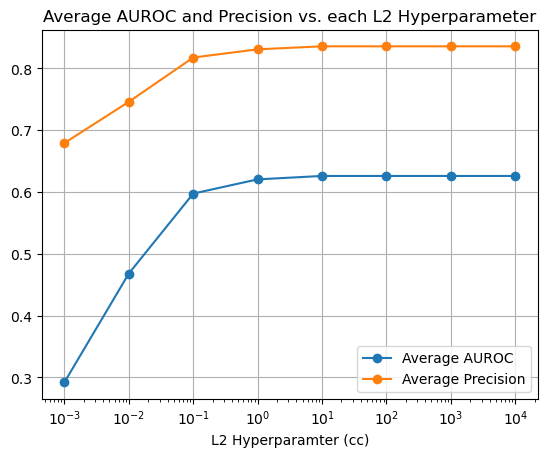

In [43]:
## Create the plot here
plt.semilogx(cc, average_rocs, label='Average AUROC', marker='o')
plt.semilogx(cc, average_prcs, label='Average Precision', marker='o')
plt.xlabel('L2 Hyperparamter (cc)')
plt.title('Average AUROC and Precision vs. each L2 Hyperparameter')
plt.legend()
plt.grid(True)